In [1]:
## Importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
## Importing file
df=pd.read_csv('S:/ML/datasets/student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory data analysis

In [3]:
## Checking shape of data
df.shape

(25, 2)

In [4]:
## Checking Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
## Checking Missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
## Checking duplicate values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

<AxesSubplot:>

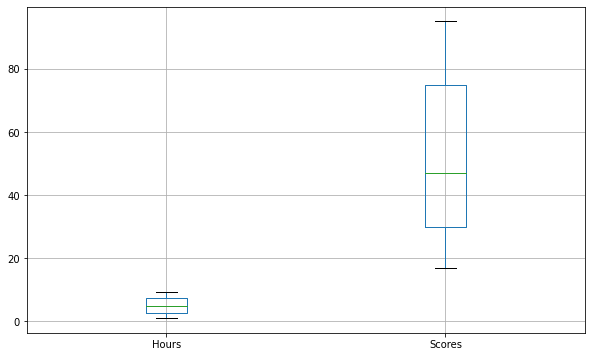

In [7]:
## Checking outliers using box plot
df.boxplot(figsize=(10,6))

Text(0, 0.5, 'Scores')

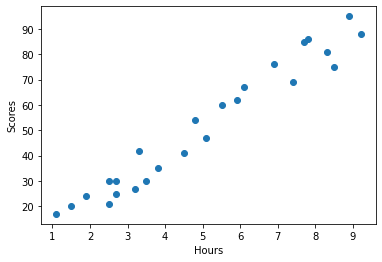

In [8]:
plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")

### Implementing Linear Regression

In [9]:
# x=Independent variable
# y= dependent variable

x=df[["Hours"]]
y=df["Scores"]

In [10]:
## Model Training on normaldata
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [11]:
#b1
model.coef_

array([9.77580339])

In [12]:
#b0
model.intercept_

2.483673405373196

In [13]:
## Model Testing
ypred=model.predict(x)
ypred

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [14]:
df["Prediction"]=ypred
df

,Hours,Scores,Prediction
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343


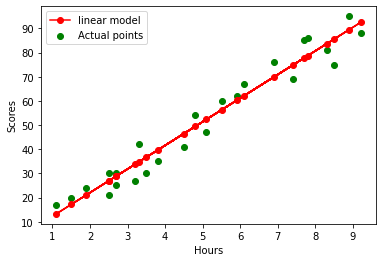

In [15]:
plt.scatter(x,y,color="g", label="Actual points")
plt.plot(x,ypred,color="r",marker="o",label="linear model")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()

In [16]:
# R square
model.score(x,y)

0.9529481969048356

#### Splitting data into train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
xtrain.shape

(17, 1)

In [20]:
xtest.shape

(8, 1)

#### Model traing on train data

In [21]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [22]:
model.coef_

array([10.41075981])

In [23]:
model.intercept_

-1.5123061161277889

#### Model testing on test data

In [24]:
ypred=model.predict(xtest)

In [25]:
output=pd.DataFrame({"Actual":ytest,"Predicted":ypred})
output

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


#### Model Evaluation

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [27]:
r2_score(ytest,ypred)

0.8933827573294114

In [28]:
mean_squared_error(ytest,ypred)

56.092330905646705

In [29]:
mean_absolute_error(ytest,ypred)

7.169048271425507

In [30]:
np.sqrt(mean_squared_error(ytest,ypred))

7.489481350911204